In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 14,6
from sklearn.preprocessing import StandardScaler
from sklearn.svm import OneClassSVM
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.cluster import KMeans

# Обзор алгоритмов кластеризации для выявления аномалий в данных (временых рядах)

Источник данных: https://github.com/numenta/NAB
machine_temperature_system_failure.csv


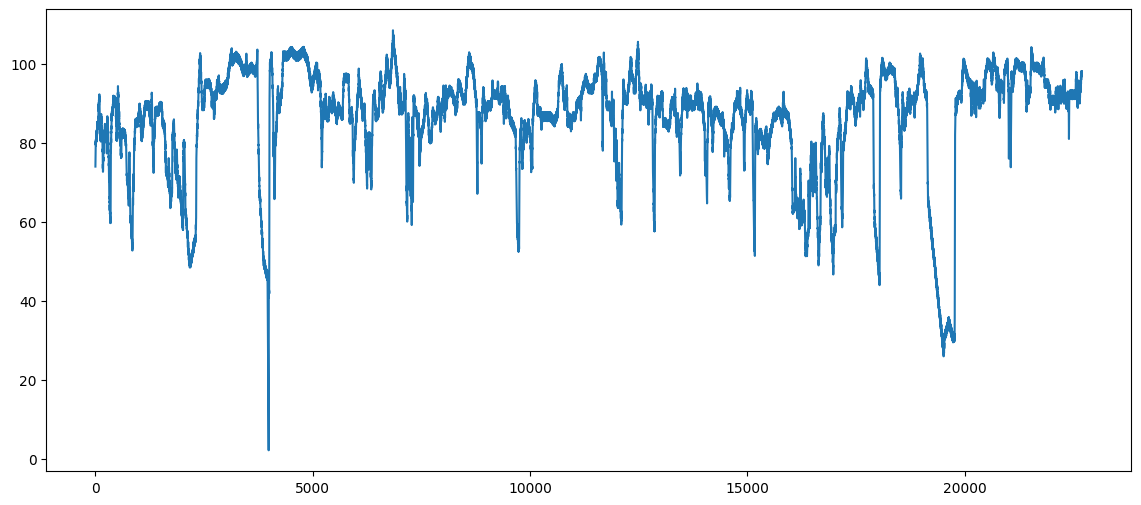

In [2]:
machine_temperature_system_failure = pd.read_csv('realKnownCause/machine_temperature_system_failure.csv')
plt.plot(machine_temperature_system_failure['value'])

In [3]:
# "realKnownCause/machine_temperature_system_failure.csv":
# маркировка точек аномалий - взято из источника данных
anomaly_points = [
         "2013-12-11 06:00:00.000000",
         "2013-12-16 17:25:00.000000",
         "2014-01-28 13:55:00.000000",
         "2014-02-08 14:30:00.000000"
    ]

In [4]:
mtsf = machine_temperature_system_failure.copy()
mtsf['timestamp'] = pd.to_datetime(mtsf['timestamp'])
mtsf['value'] = (mtsf['value'] - 32) * 5 / 9
mtsf['anomaly'] = 0
for ap in anomaly_points:
    print(ap)
    mtsf.loc[(mtsf['timestamp'] == ap),'anomaly'] = 1

2013-12-11 06:00:00.000000
2013-12-16 17:25:00.000000
2014-01-28 13:55:00.000000
2014-02-08 14:30:00.000000


In [5]:
mtsf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22695 entries, 0 to 22694
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timestamp  22695 non-null  datetime64[ns]
 1   value      22695 non-null  float64       
 2   anomaly    22695 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 532.0 KB


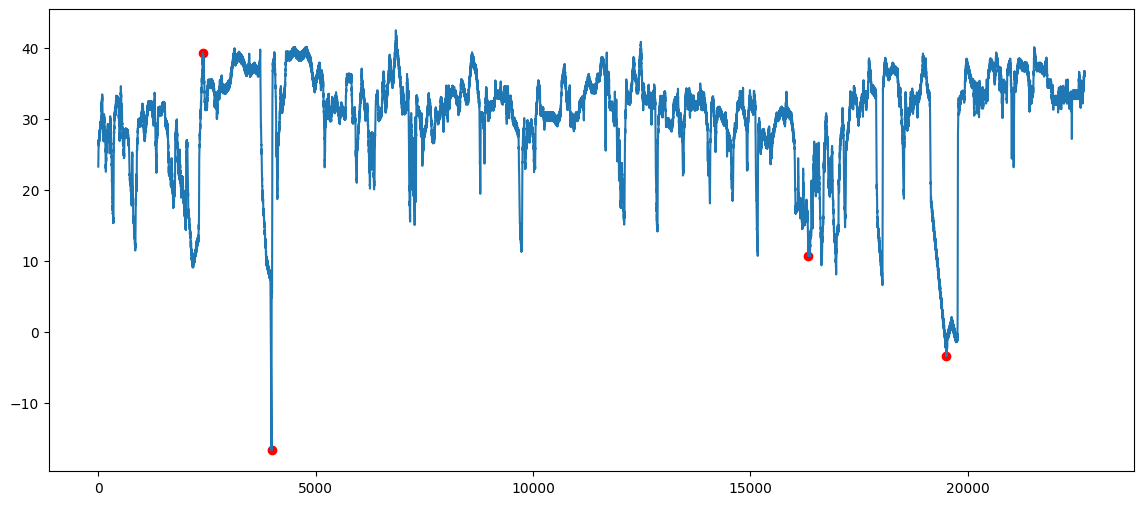

In [6]:
# график данных с маркироваными аномалиями (взято из источника данных)
plt.plot(mtsf['value'])
plt.scatter(x=mtsf[mtsf['anomaly']==1].index,
            y = mtsf[mtsf['anomaly']==1]['value'],
            marker = 'o', color = 'red' )

In [7]:
# Функция для отрисовки графика данных, реальных аномалий и аномалий найденных моделью
def plot_anomaly(data,model, title, mark=-1):    
    model_ret = model.fit_predict(data['value'].values.reshape(-1, 1))
    data_df = pd.DataFrame()
    data_df['value'] = data['value']
    data_df['model_anomaly']  = [1 if i==mark else 0 for i in model_ret]
    plt.plot(data['value'], label="data")
    plt.scatter(x=mtsf[mtsf['anomaly']==1].index,
            y = mtsf[mtsf['anomaly']==1]['value'],
            marker = 'o', color = 'red', label="anomaly" )
    plt.scatter(x=data_df[data_df['model_anomaly']==1].index,
            y = data_df[data_df['model_anomaly']==1]['value'],
            marker = 'x', color = 'orange', label="model anomaly" )
    plt.legend(loc="best")
    plt.title(title)

### One Class SVM

In [8]:
ocsvm_model = OneClassSVM(nu=0.01, gamma=0.001, kernel='rbf')

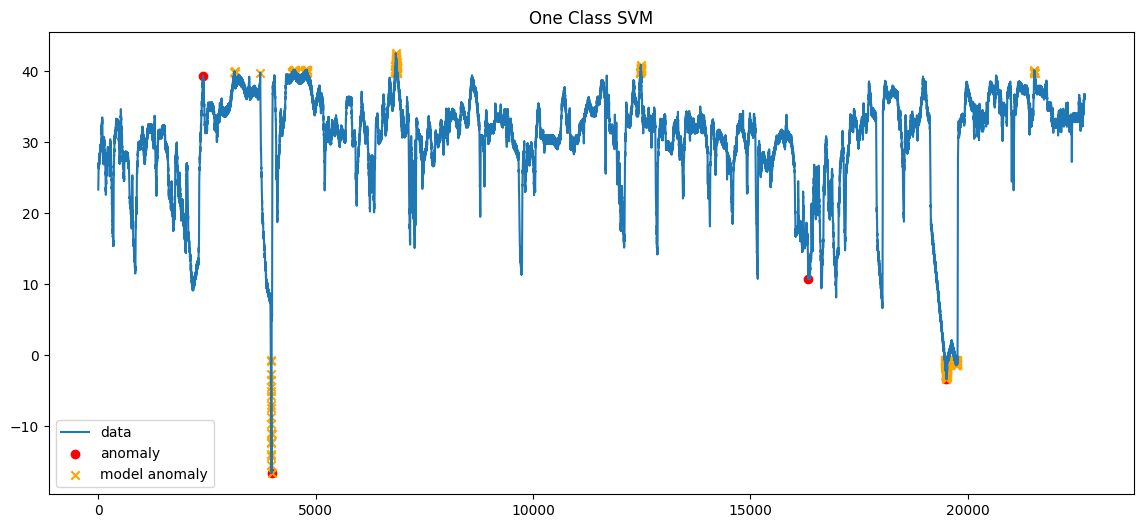

In [9]:
plot_anomaly(mtsf,ocsvm_model, 'One Class SVM')

### Isolation Forest

In [10]:
iforest_model = IsolationForest(n_estimators=200, contamination=0.05, max_samples=200)

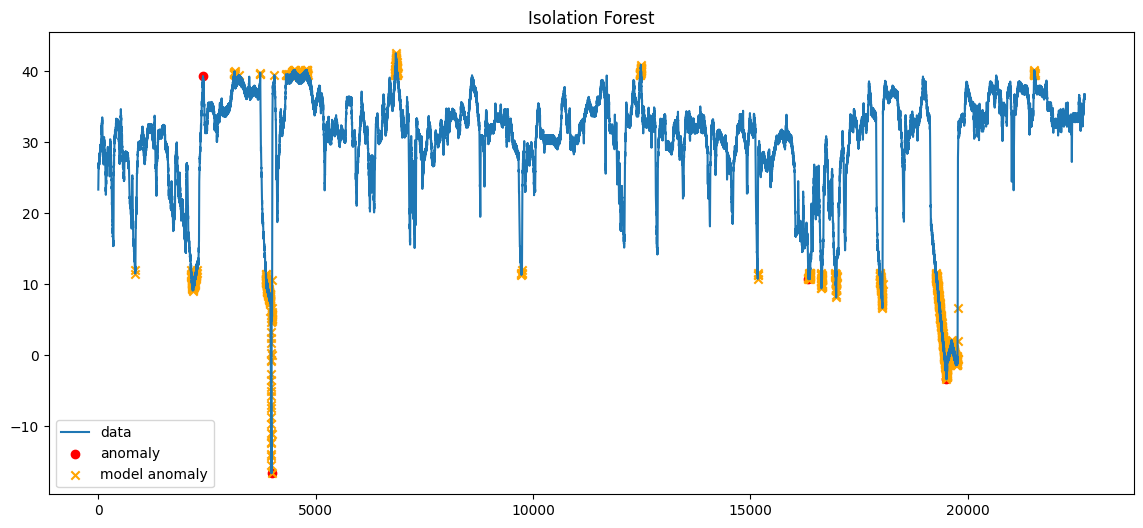

In [11]:
plot_anomaly(mtsf,iforest_model, 'Isolation Forest')

### K means

In [12]:
kmeans_model = KMeans(n_clusters=2, random_state=0, n_init=10)

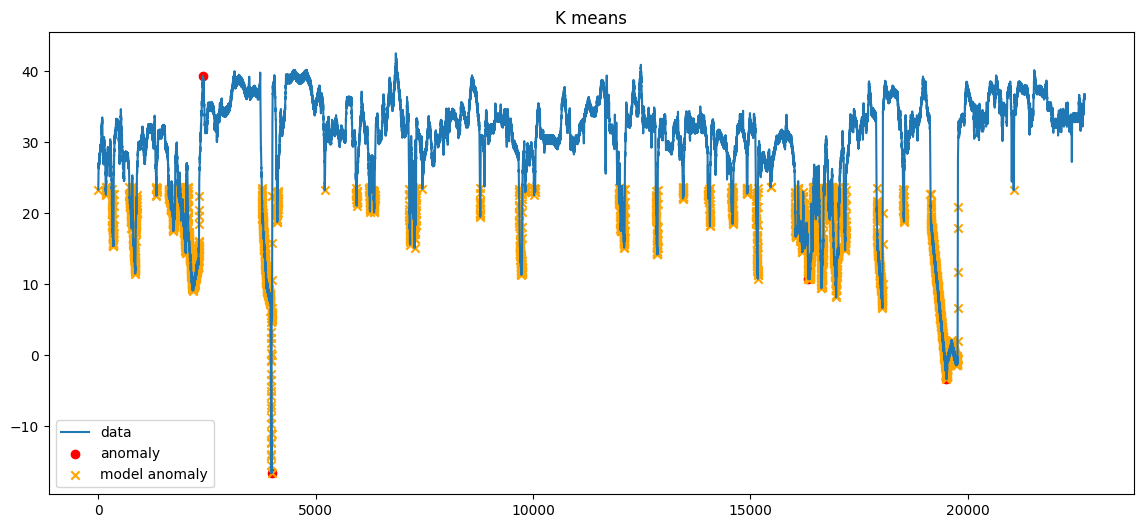

In [13]:
plot_anomaly(mtsf,kmeans_model, 'K means', mark = 1)

### Gaussian Mixture Models (GMM)

In [14]:
from sklearn.mixture import GaussianMixture

In [15]:
gmm_model = GaussianMixture(n_components=2, random_state=0)

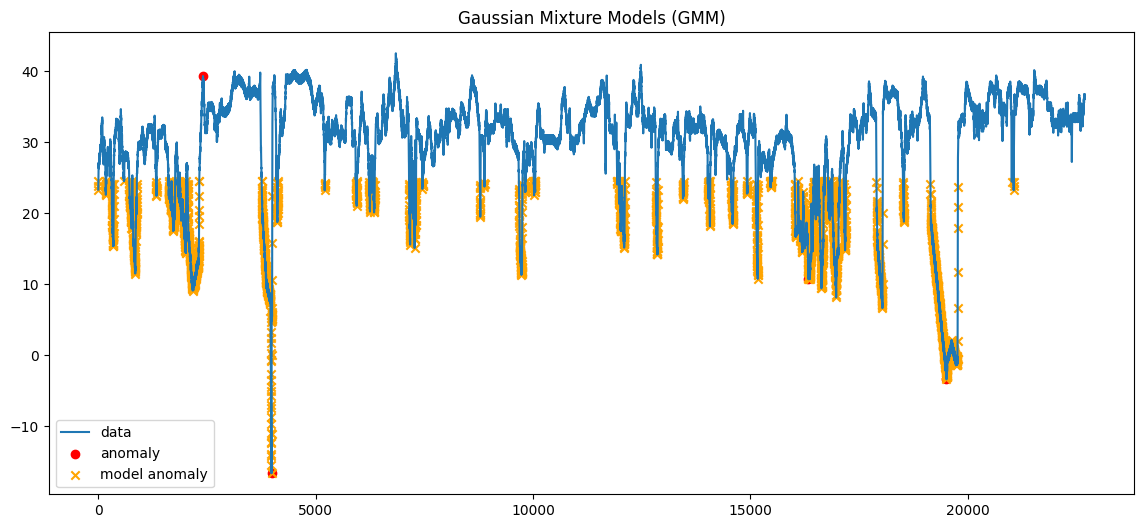

In [16]:
plot_anomaly(mtsf,gmm_model, 'Gaussian Mixture Models (GMM)', mark = 1)

### DBScan

In [17]:
from sklearn.cluster import DBSCAN

In [18]:
dbscan_model = DBSCAN(eps=0.15, min_samples=10)

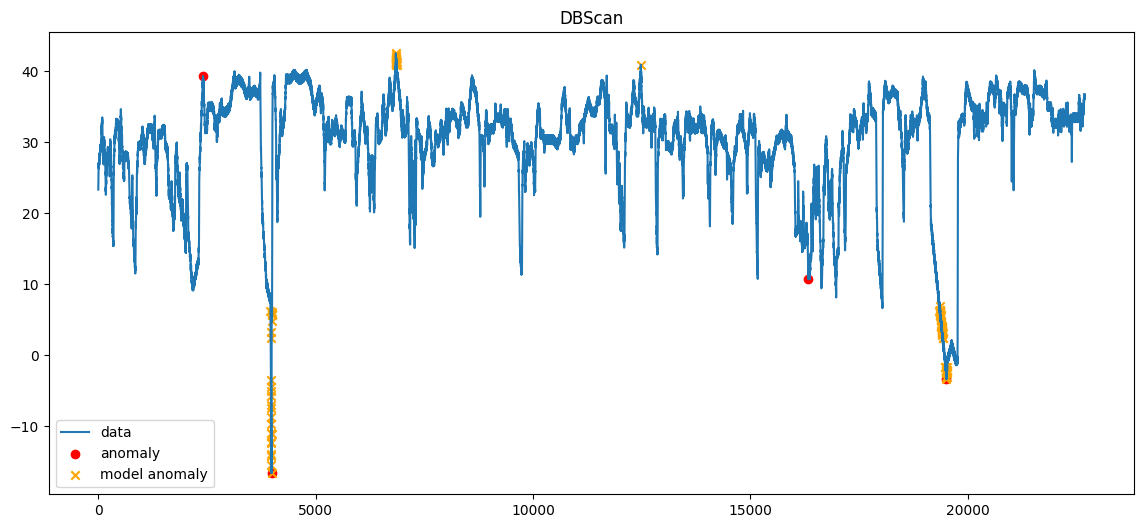

In [19]:
plot_anomaly(mtsf,dbscan_model, 'DBScan')

### BIRCH

In [20]:
from sklearn.cluster import Birch

In [21]:
brich_model = Birch(threshold=0.000001, n_clusters=2)

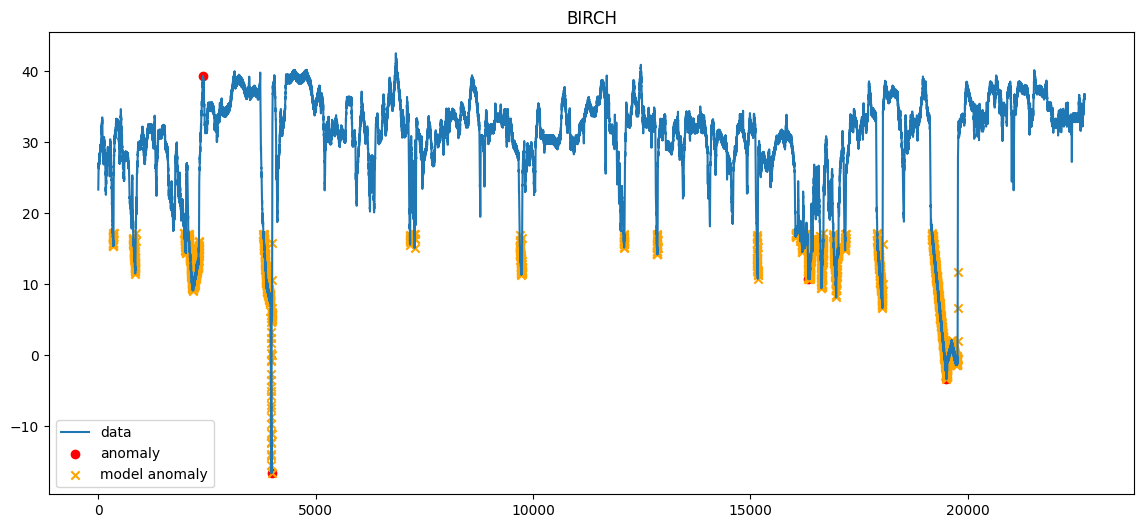

In [22]:
plot_anomaly(mtsf,brich_model, 'BIRCH', mark=1)

### Agglomerative Hierarchy clustering algorithm

In [23]:
from sklearn.cluster import AgglomerativeClustering

In [24]:
ah_model = AgglomerativeClustering(n_clusters=2)

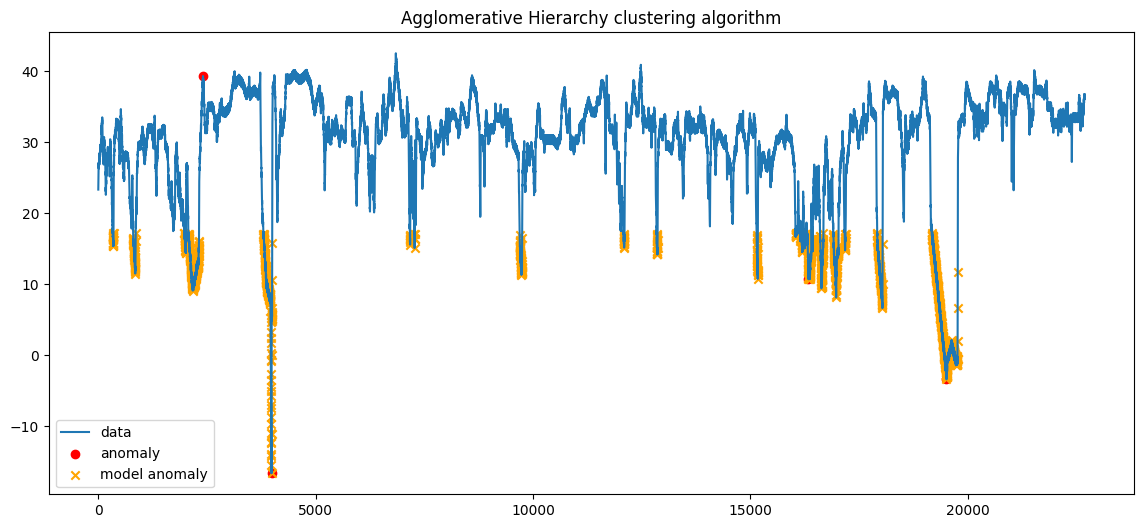

In [25]:
plot_anomaly(mtsf,ah_model, 'Agglomerative Hierarchy clustering algorithm', mark=1)

In [26]:
from sklearn.cluster import OPTICS

In [27]:
optics_model = OPTICS(cluster_method='xi', min_cluster_size=0.95)

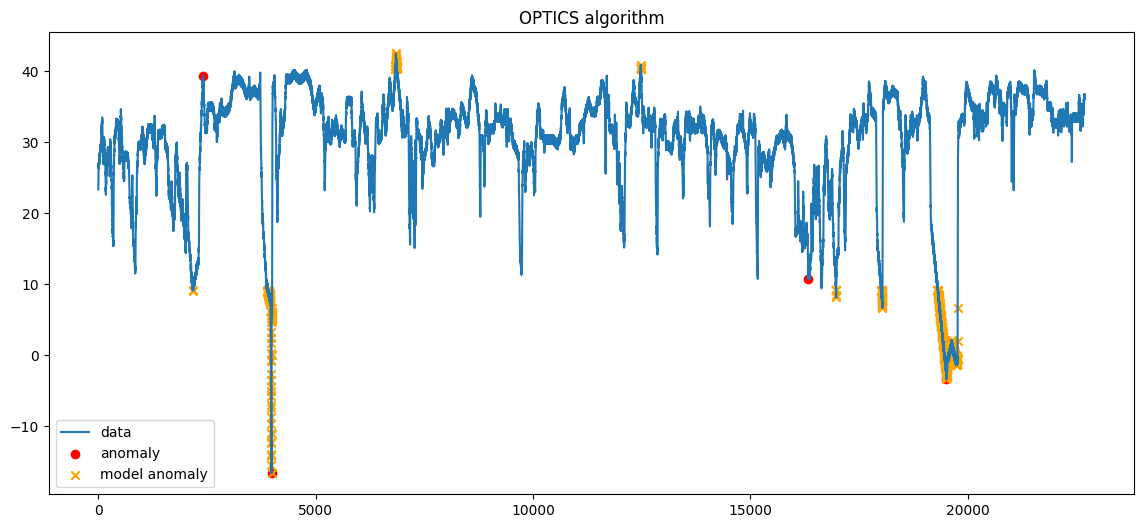

In [28]:
plot_anomaly(mtsf,optics_model, 'OPTICS algorithm')

### Mean-Shift clustering algorithm

In [29]:
from sklearn.cluster import MeanShift

In [30]:
ms_model = MeanShift()

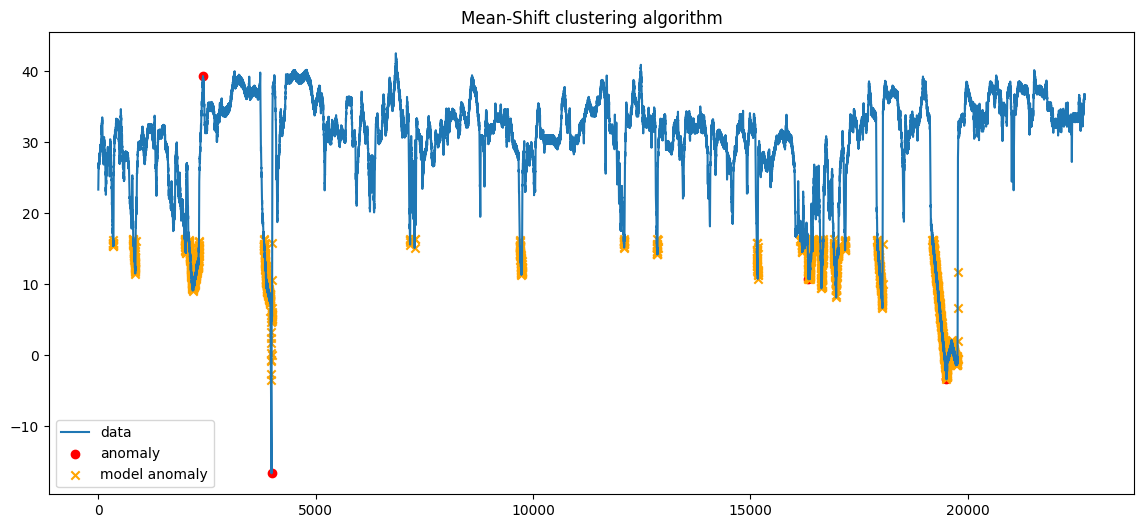

In [31]:
plot_anomaly(mtsf,ms_model, 'Mean-Shift clustering algorithm', mark=1)